In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load dataset

In [319]:
def load_data(file_path):
    """Load data from a CSV file."""
    return pd.read_csv(file_path)

In [320]:
pd.set_option('display.max_columns', None)
df = load_data("../data/Fraud Detection Dataset.csv")
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


In [321]:
startup_df = load_data("../data/startup_data.csv")
startup_df.head()

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired


In [322]:
obj = df.select_dtypes(include=["object"]).columns.tolist()
nums = df.select_dtypes(include=["number"]).columns.tolist()

print(f"Object dataset: {(obj)}")
print(f"Number dataset: {(nums)}")

Object dataset: ['Transaction_ID', 'Transaction_Type', 'Device_Used', 'Location', 'Payment_Method']
Number dataset: ['User_ID', 'Transaction_Amount', 'Time_of_Transaction', 'Previous_Fraudulent_Transactions', 'Account_Age', 'Number_of_Transactions_Last_24H', 'Fraudulent']


In [323]:
# Handle missing values
df.dropna(inplace=True)

In [324]:
df.head(7)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
5,T6,2095,2372.04,ATM Withdrawal,15.0,Desktop,Boston,3,96,14,Credit Card,0
6,T7,4772,544.81,Bill Payment,2.0,Tablet,Boston,3,6,9,UPI,1
7,T8,4092,635.75,ATM Withdrawal,13.0,Tablet,Boston,2,13,10,Debit Card,0


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39583 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    39583 non-null  object 
 1   User_ID                           39583 non-null  int64  
 2   Transaction_Amount                39583 non-null  float64
 3   Transaction_Type                  39583 non-null  object 
 4   Time_of_Transaction               39583 non-null  float64
 5   Device_Used                       39583 non-null  object 
 6   Location                          39583 non-null  object 
 7   Previous_Fraudulent_Transactions  39583 non-null  int64  
 8   Account_Age                       39583 non-null  int64  
 9   Number_of_Transactions_Last_24H   39583 non-null  int64  
 10  Payment_Method                    39583 non-null  object 
 11  Fraudulent                        39583 non-null  int64  
dtypes: f

In [326]:
df.describe()

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,39583.000000,39583.000000,39583.000000,39583.000000,39583.000000,39583.000000,39583.000000
mean,3006.252785,2995.273051,11.459617,1.995528,59.944471,7.495541,0.048809
std,1154.046550,5050.702270,6.912935,1.414340,34.321202,4.017372,0.215471
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2009.000000,1267.435000,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2993.000000,2521.670000,11.000000,2.000000,60.000000,7.000000,0.000000
75%,4009.000000,3781.080000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


# Feature engineering dataframe
### **Data quality check -> instead best data quality**

In [ ]:
from datetime import datetime, timedelta

# Data quality decisions
df = df[df["Time_of_Transaction"].notna()]
df = df[df["Time_of_Transaction"].between(0, 24)] # Valid hours onyl feature engineered

# Convert float hours to Datetime
base_date = pd.Timestamp('2025-01-01') # Timestamp into calendar relevant (note: u can change based on year or current year (time)
df["Time_of_Transaction"] = base_date + pd.to_timedelta(df["Time_of_Transaction"], 
                                                        unit='h') # Hours

# Sort by time
df = df.sort_values(by="Time_of_Transaction")

# Set as index operations work smoothly


# Feature engineering dataframe

In [340]:
# Feature engineering for transaction time
df["Time_of_Transaction"] = pd.to_datetime(df["Time_of_Transaction"], format='%Y-%m-%d %H:%M:%S', errors="coerce")

df = (
    df.sort_values(["User_ID", "Time_of_Transaction"]).set_index("Time_of_Transaction")
)

In [341]:
# Compute additional windows time (1 hour, 7 days)
df["txn_1h"] = (
    df.groupby("User_ID").rolling("1H")["Transaction_ID"].count().shift(1).reset_index(level=0, drop=True)
)
df["txn_7d"] = (
    df.groupby("User_ID").rolling("7D")["Transaction_ID"].count().shift(1).reset_index(level=0, drop=True)
)

# Relative velocity
df["relative_txn_24h"] = (
    df["Number_of_Transactions_Last_24H"] / (df["txn_7d"] / 7 + 1)
)

df = df.reset_index() # Reset index make index data index to colummn

In [342]:
df.head()

,Time_of_Transaction,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent,txn_1h,txn_7d,relative_txn_24h
0,1970-01-01 00:00:00.000000004,T38444,1000,3140.55,Online Purchase,Desktop,Los Angeles,1,104,11,Invalid Method,0,NaN,NaN,NaN
1,1970-01-01 00:00:00.000000010,T15309,1000,4394.37,Bill Payment,Tablet,Chicago,0,61,8,Net Banking,0,1.0,1.0,7.000000
2,1970-01-01 00:00:00.000000010,T22243,1000,982.92,Bill Payment,Mobile,Houston,2,98,8,Net Banking,0,2.0,2.0,6.222222
3,1970-01-01 00:00:00.000000010,T29113,1000,1197.00,Bill Payment,Mobile,Seattle,2,40,2,UPI,0,3.0,3.0,1.400000
4,1970-01-01 00:00:00.000000010,T29113,1000,1197.00,Bill Payment,Mobile,Seattle,2,40,2,UPI,0,4.0,4.0,1.272727


## Goals project

* Fraud detection
* Assesment risk

## Developed data features become

#### * **Target**
#### * **Object cols**
#### * **Numeric cols**

In [343]:
# Developed dataset become particular
TARGET = ['Fraudulent']
OBJECT = ['Transaction_ID', 'Transaction_Type', 'Device_Used', 'Location', 'Payment_Method']
NUMERIC = ['User_ID', 'Transaction_Amount', 'Time_of_Transaction', 'Previous_Fraudulent_Transactions', 'Account_Age', 'Number_of_Transactions_Last_24H']


In [344]:
X = df[OBJECT + NUMERIC].drop(columns=["Transaction_ID", "User_ID"])
y = df[TARGET]

# Data encoding

In [333]:
# Encoding data on categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns
# Iterate through each categorical column and apply label encoding
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

<Axes: >

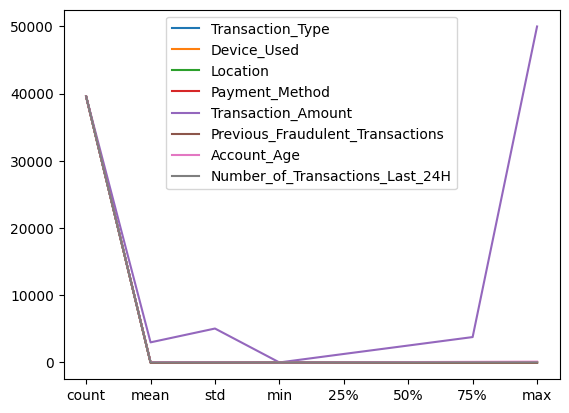

In [334]:
X.describe().plot()

In [335]:
X['Transaction'] = X["Transaction_Type"] * X["Transaction_Amount"]
X.head()

,Transaction_Type,Device_Used,Location,Payment_Method,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Transaction
0,3,0,3,2,3140.55,1970-01-01 00:00:00.000000004,1,104,11,9421.65
1,2,2,1,3,4394.37,1970-01-01 00:00:00.000000010,0,61,8,8788.74
2,2,1,2,3,982.92,1970-01-01 00:00:00.000000010,2,98,8,1965.84
3,2,1,7,4,1197.00,1970-01-01 00:00:00.000000010,2,40,2,2394.00
4,2,1,7,4,1197.00,1970-01-01 00:00:00.000000010,2,40,2,2394.00


In [336]:
X["Number_of_Transactions_Last_24H"].value_counts()

5     2934
8     2914
7     2905
11    2865
13    2854
3     2848
10    2841
4     2826
1     2811
12    2796
6     2786
14    2764
2     2746
9     2693
Name: Number_of_Transactions_Last_24H, dtype: int64

In [337]:
X["Account_Age"].value_counts()

45     379
106    375
29     372
59     371
58     362
      ... 
42     307
97     302
86     302
14     302
12     294
Name: Account_Age, Length: 119, dtype: int64

## StandardScaler data handling

In [338]:
# Minmaxscaler data handling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ("standard_scaled", StandardScaler())
    ]
)

## Pipeline model logic

In [339]:
from sklearn.pipeline import Pipeline

models = {
}

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model")
    ]
)